In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics, cross_validation
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#import data
weather = pd.read_csv('seattleWeather_1948-2017.csv')
weather.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [3]:
weather.describe(include='all')

#25551 rows with few missing values in PRCP. Need to convert DATE to date and

,DATE,PRCP,TMAX,TMIN,RAIN
count,25551,25548.000000,25551.000000,25551.000000,25548
unique,25551,NaN,NaN,NaN,2
top,1978-02-22,NaN,NaN,NaN,False
freq,1,NaN,NaN,NaN,14648
mean,NaN,0.106222,59.544206,44.514226,NaN
std,NaN,0.239031,12.772984,8.892836,NaN
min,NaN,0.000000,4.000000,0.000000,NaN
25%,NaN,0.000000,50.000000,38.000000,NaN
50%,NaN,0.000000,58.000000,45.000000,NaN
75%,NaN,0.100000,69.000000,52.000000,NaN


In [4]:
#Rows with null values
weather[weather.isnull().any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [5]:
#Drop rows with NaN value
weather = weather.dropna(axis=0, how='any')

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null object
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [7]:
#Set DATE column as date type

weather['DATE'] =pd.to_datetime(weather['DATE'])

In [8]:
#Set RAIN column as boolean
weather['RAIN'] = weather.RAIN.astype(bool)

In [9]:
#attempting to remove infinite values (no infinite values)
#weather.replace([np.inf, -np.inf], np.nan)
#weather = weather.dropna(axis=0, how='any')

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25548 non-null datetime64[ns]
PRCP    25548 non-null float64
TMAX    25548 non-null int64
TMIN    25548 non-null int64
RAIN    25548 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 1022.9 KB


In [11]:
#add three extra columns: TMAX-TMIN, Tmax/Tmin, Rained before?
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
#weather['TDIV'] = weather['TMAX']/weather['TMIN']

#Rained 1 day before column
weather['R1DB4'] = weather['RAIN'].shift()

In [12]:
#First Row has a NaN value on R1DB4 and not part of the train nor test data, therefore remove it
weather = weather[1:]

In [13]:
weather.describe()

,PRCP,TMAX,TMIN,TDIFF
count,25547.000000,25547.000000,25547.000000,25547.000000
mean,0.106207,59.543391,44.513485,15.029906
std,0.239025,12.773403,8.893179,6.834424
min,0.000000,4.000000,0.000000,-35.000000
25%,0.000000,50.000000,38.000000,10.000000
50%,0.000000,58.000000,45.000000,14.000000
75%,0.100000,69.000000,52.000000,19.000000
max,5.020000,103.000000,71.000000,42.000000


In [14]:
#Investigate negative TDIFF
weather.loc[(weather['TDIFF'] < 0)]

#likely to be an input error = remove row 1418
weather = weather.drop(weather.index[1418])
weather.describe()

,PRCP,TMAX,TMIN,TDIFF
count,25546.000000,25546.000000,25546.000000,25546.000000
mean,0.106208,59.545565,44.513701,15.031864
std,0.239030,12.768924,8.893286,6.827386
min,0.000000,16.000000,0.000000,1.000000
25%,0.000000,50.000000,38.000000,10.000000
50%,0.000000,58.000000,45.000000,14.000000
75%,0.100000,69.000000,52.000000,19.000000
max,5.020000,103.000000,71.000000,42.000000


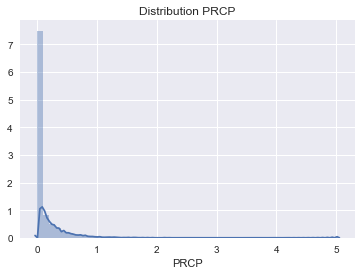

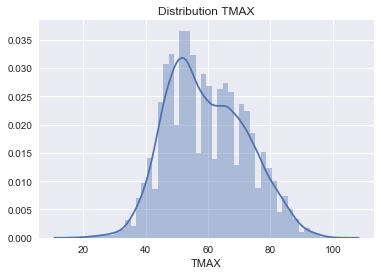

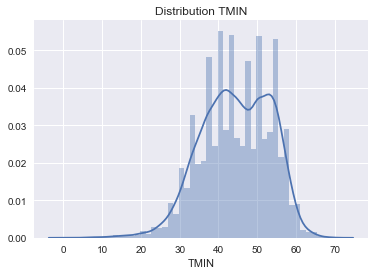

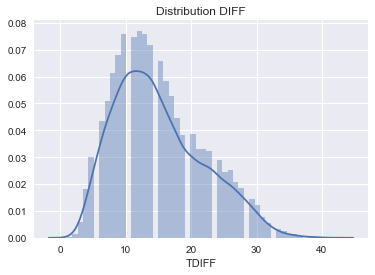

In [16]:
#Checking the distributions
sns.distplot(weather['PRCP'])
plt.title('Distribution PRCP')
plt.show()

sns.distplot(weather['TMAX'])
plt.title('Distribution TMAX')
plt.show()

sns.distplot(weather['TMIN'])
plt.title('Distribution TMIN')
plt.show()

sns.distplot(weather['TDIFF'])
plt.title('Distribution DIFF')

plt.show()

In [17]:
#Investigate potentail Outliers for PRCP
weather.loc[(weather['PRCP'] > 3)]

#These are potential outliers are just keeping it for now

,DATE,PRCP,TMAX,TMIN,RAIN,TDIFF,R1DB4
4341,1959-11-20,3.41,53,46,True,7,True
17570,1996-02-08,3.06,56,46,True,10,True
18591,1998-11-25,3.04,50,46,True,4,True
20381,2003-10-20,5.02,65,56,True,9,True
21494,2006-11-06,3.29,60,55,True,5,True
21886,2007-12-03,3.77,59,46,True,13,True


In [18]:
#Split training data and test data using the set dates train =(1950-2009), test=(2010-2017)
weather_train = weather.loc[(weather['DATE'] >= pd.datetime(1950,1,1)) & (weather['DATE'] <= pd.datetime(2009,12,31))]
weather_test= weather.loc[weather['DATE'] >= pd.datetime(2010,1,1)]

In [19]:
#Setting variables to play around
y_train = weather_train['RAIN']
X_train = weather_train.drop(['RAIN','DATE','PRCP'], axis=1)

y_test = weather_test['RAIN']
X_test = weather_test.drop(['RAIN','DATE','PRCP'], axis =1)

In [20]:
ridge_cv = RidgeClassifierCV(alphas=(0.1, 100.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, class_weight=None)
ridge_cv.fit(X_train,y_train)
print('Coef: ' , ridge_cv.coef_)
print('Optimal Alpha Value: ', ridge_cv.alpha_)

Coef:  [[-0.02066422  0.02580564 -0.04646986  0.43159247]]
Optimal Alpha Value:  0.1


In [21]:
##Looks like the rained before is a good indicator, other values -> TMAX,TMIN,TDIFF doesn't make much of a difference.

#Train data prediction
preds_train = ridge_cv.predict(X_train)

# compute null accuracy
print ("Train Rained Mean: " , y_train.mean())
print ("Null Accuracy" , 1 - y_train.mean())

print ("Accuracy :" , metrics.accuracy_score(y_train, preds_train))

Train Rained Mean:  0.423668477021
Null Accuracy 0.576331522979
Accuracy : 0.76445620921


In [22]:
#Test data prediction
preds_test = ridge_cv.predict(X_test)

# compute null accuracy
print ("Train Rained Mean: " , y_test.mean())
print ("Null Accuracy" , 1 - y_test.mean())

print ("Accuracy :" , metrics.accuracy_score(y_test, preds_test))

Train Rained Mean:  0.447504302926
Null Accuracy 0.552495697074
Accuracy : 0.767297762478


In [23]:
print("Confusion Matrix Train(train data): ", metrics.confusion_matrix(y_train, preds_train, labels=weather.RAIN.unique(), sample_weight=None))

Confusion Matrix Train(train data):  [[6995 2288]
 [2873 9755]]


In [24]:
print("Confusion Matrix Test(test data): ",metrics.confusion_matrix(y_test, preds_test, labels=weather.RAIN.unique(), sample_weight=None))

Confusion Matrix Test(test data):  [[1001  299]
 [ 377 1228]]


So It looks like we get around 76% accuracy for estimating the likelihood of rain on the day by using rained the day before? (After a quick observation)
Going to make few other features to find factors that correlates with rain.

In [25]:
# #Create multiple different features to observe. Look at data 1-7days before.
# #compare look at mean(), sum() of PRCP,TMAX,TMIN,RAIN

# ##PRCP SUM
# for x in range(1,8):
#      weather['PRCP_sum_'+str(x)+'DB4'] = weather.PRCP.rolling(x, min_periods=x, on=None, axis=0, closed=None).sum().shift

# ##PRCP mean
# for x in range(1,8):
#      weather['PRCP_mean_'+str(x)+'DB4'] = weather.PRCP.rolling(x, min_periods=x, on=None, axis=0, closed=None).mean().shift()

# ##TMAX SUM
# for x in range(1,8):
#      weather['TMAX_mean_'+str(x)+'DB4'] = weather.TMAX.rolling(x, min_periods=x, on=None, axis=0, closed=None).mean().shift()

# ##TMAX

In [30]:
# Function to add extra coloum. operations = "sum" or "mean". r= number of previous date we want to look at. 
def addPRCP(operation,r):
    if operation == "sum":
        for x in range(1,r+1):
            weather['PRCP_sum'+ str(x) + 'DB4'] = weather.PRCP.rolling(x, min_periods=x, on=None, axis=0).sum().shift()
    elif operation == "mean":
        for x in range(1,r+1):
            weather['PRCP_mean'+ str(x) + 'DB4'] = weather.PRCP.rolling(x, min_periods=x, on=None, axis=0).mean().shift()
    else:
        print("operation values must be sum or mean")

# Tmax sum & mean        
def addTMAX(operation,r):
    if operation == "sum":
        for x in range(1,r+1):
            weather['TMAX_sum'+ str(x) + 'DB4'] = weather.TMAX.rolling(x, min_periods=x, on=None, axis=0).sum().shift()
    elif operation == "mean":
        for x in range(1,r+1):
            weather['TMAX_mean'+ str(x) + 'DB4'] = weather.TMAX.rolling(x, min_periods=x, on=None, axis=0).mean().shift()
    else:
        print("operation values must be sum or mean")
        
# Tmin sum & mean
def addTMIN(operation,r):
    if operation == "sum":
        for x in range(1,r+1):
            weather['TMIN_sum'+ str(x) + 'DB4'] = weather.TMIN.rolling(x, min_periods=x, on=None, axis=0).sum().shift()
    elif operation == "mean":
        for x in range(1,r+1):
            weather['TMIN_mean'+ str(x) + 'DB4'] = weather.TMIN.rolling(x, min_periods=x, on=None, axis=0).mean().shift()
    else:
        print("operation values must be sum or mean")

In [31]:
#add PRCRP,TMAX, TMIN 1-7 days
addPRCP('sum',7)
addPRCP('mean',7)
addTMAX('sum',7)
addTMAX('mean',7)
addTMIN('sum',7)
addTMIN('mean',7)

In [33]:
weather.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN,TDIFF,R1DB4,PRCP_sum1DB4,PRCP_sum2DB4,PRCP_sum3DB4,...,TMIN_sum5DB4,TMIN_sum6DB4,TMIN_sum7DB4,TMIN_mean1DB4,TMIN_mean2DB4,TMIN_mean3DB4,TMIN_mean4DB4,TMIN_mean5DB4,TMIN_mean6DB4,TMIN_mean7DB4
1,1948-01-02,0.59,45,36,True,9,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-01-03,0.42,45,35,True,10,True,5.900000e-01,NaN,NaN,...,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-01-04,0.31,45,34,True,11,True,4.200000e-01,1.010000e+00,NaN,...,NaN,NaN,NaN,35.0,35.5,NaN,NaN,NaN,NaN,NaN
4,1948-01-05,0.17,45,32,True,13,True,3.100000e-01,7.300000e-01,1.320000e+00,...,NaN,NaN,NaN,34.0,34.5,35.000000,NaN,NaN,NaN,NaN
5,1948-01-06,0.44,48,39,True,9,True,1.700000e-01,4.800000e-01,9.000000e-01,...,NaN,NaN,NaN,32.0,33.0,33.666667,34.25,NaN,NaN,NaN
6,1948-01-07,0.41,50,40,True,10,True,4.400000e-01,6.100000e-01,9.200000e-01,...,176.0,NaN,NaN,39.0,35.5,35.000000,35.00,35.2,NaN,NaN
7,1948-01-08,0.04,48,35,True,13,True,4.100000e-01,8.500000e-01,1.020000e+00,...,180.0,216.0,NaN,40.0,39.5,37.000000,36.25,36.0,36.000000,NaN
8,1948-01-09,0.12,50,31,True,19,True,4.000000e-02,4.500000e-01,8.900000e-01,...,180.0,215.0,251.0,35.0,37.5,38.000000,36.50,36.0,35.833333,35.857143
9,1948-01-10,0.74,43,34,True,9,True,1.200000e-01,1.600000e-01,5.700000e-01,...,177.0,211.0,246.0,31.0,33.0,35.333333,36.25,35.4,35.166667,35.142857
10,1948-01-11,0.01,42,32,True,10,True,7.400000e-01,8.600000e-01,9.000000e-01,...,179.0,211.0,245.0,34.0,32.5,33.333333,35.00,35.8,35.166667,35.000000


,DATE,PRCP,TMAX,TMIN,RAIN,TDIFF,R1DB4,PRCP_sum1DB4,PRCP_sum2DB4,PRCP_sum3DB4,PRCP_sum4DB4,PRCP_sum5DB4,PRCP_sum6DB4,PRCP_sum7DB4
1,1948-01-02,0.59,45,36,True,9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-01-03,0.42,45,35,True,10,True,5.900000e-01,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-01-04,0.31,45,34,True,11,True,4.200000e-01,1.010000e+00,NaN,NaN,NaN,NaN,NaN
4,1948-01-05,0.17,45,32,True,13,True,3.100000e-01,7.300000e-01,1.320000e+00,NaN,NaN,NaN,NaN
5,1948-01-06,0.44,48,39,True,9,True,1.700000e-01,4.800000e-01,9.000000e-01,1.490000e+00,NaN,NaN,NaN
6,1948-01-07,0.41,50,40,True,10,True,4.400000e-01,6.100000e-01,9.200000e-01,1.340000e+00,1.930000e+00,NaN,NaN
7,1948-01-08,0.04,48,35,True,13,True,4.100000e-01,8.500000e-01,1.020000e+00,1.330000e+00,1.750000e+00,2.340000e+00,NaN
8,1948-01-09,0.12,50,31,True,19,True,4.000000e-02,4.500000e-01,8.900000e-01,1.060000e+00,1.370000e+00,1.790000e+00,2.380000e+00
9,1948-01-10,0.74,43,34,True,9,True,1.200000e-01,1.600000e-01,5.700000e-01,1.010000e+00,1.180000e+00,1.490000e+00,1.910000e+00
10,1948-01-11,0.01,42,32,True,10,True,7.400000e-01,8.600000e-01,9.000000e-01,1.310000e+00,1.750000e+00,1.920000e+00,2.230000e+00


In [35]:
## upto 7 Row has a NaN value on the newly created and not part of the train nor test data, therefore remove it
weather = weather[7:]

In [36]:
weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN,TDIFF,R1DB4,PRCP_sum1DB4,PRCP_sum2DB4,PRCP_sum3DB4,...,TMIN_sum5DB4,TMIN_sum6DB4,TMIN_sum7DB4,TMIN_mean1DB4,TMIN_mean2DB4,TMIN_mean3DB4,TMIN_mean4DB4,TMIN_mean5DB4,TMIN_mean6DB4,TMIN_mean7DB4
8,1948-01-09,0.12,50,31,True,19,True,4.000000e-02,0.45,0.89,...,180.0,215.0,251.0,35.0,37.5,38.000000,36.50,36.0,35.833333,35.857143
9,1948-01-10,0.74,43,34,True,9,True,1.200000e-01,0.16,0.57,...,177.0,211.0,246.0,31.0,33.0,35.333333,36.25,35.4,35.166667,35.142857
10,1948-01-11,0.01,42,32,True,10,True,7.400000e-01,0.86,0.90,...,179.0,211.0,245.0,34.0,32.5,33.333333,35.00,35.8,35.166667,35.000000
11,1948-01-12,0.00,41,26,False,15,True,1.000000e-02,0.75,0.87,...,172.0,211.0,243.0,32.0,33.0,32.333333,33.00,34.4,35.166667,34.714286
12,1948-01-13,0.00,45,29,False,16,False,-1.023487e-16,0.01,0.75,...,158.0,198.0,237.0,26.0,29.0,30.666667,30.75,31.6,33.000000,33.857143


In [37]:
#New Train and Test data
#Split training data and test data using the set dates train =(1950-2009), test=(2010-2017)
weather_train = weather.loc[(weather['DATE'] >= pd.datetime(1950,1,1)) & (weather['DATE'] <= pd.datetime(2009,12,31))]
weather_test= weather.loc[weather['DATE'] >= pd.datetime(2010,1,1)]

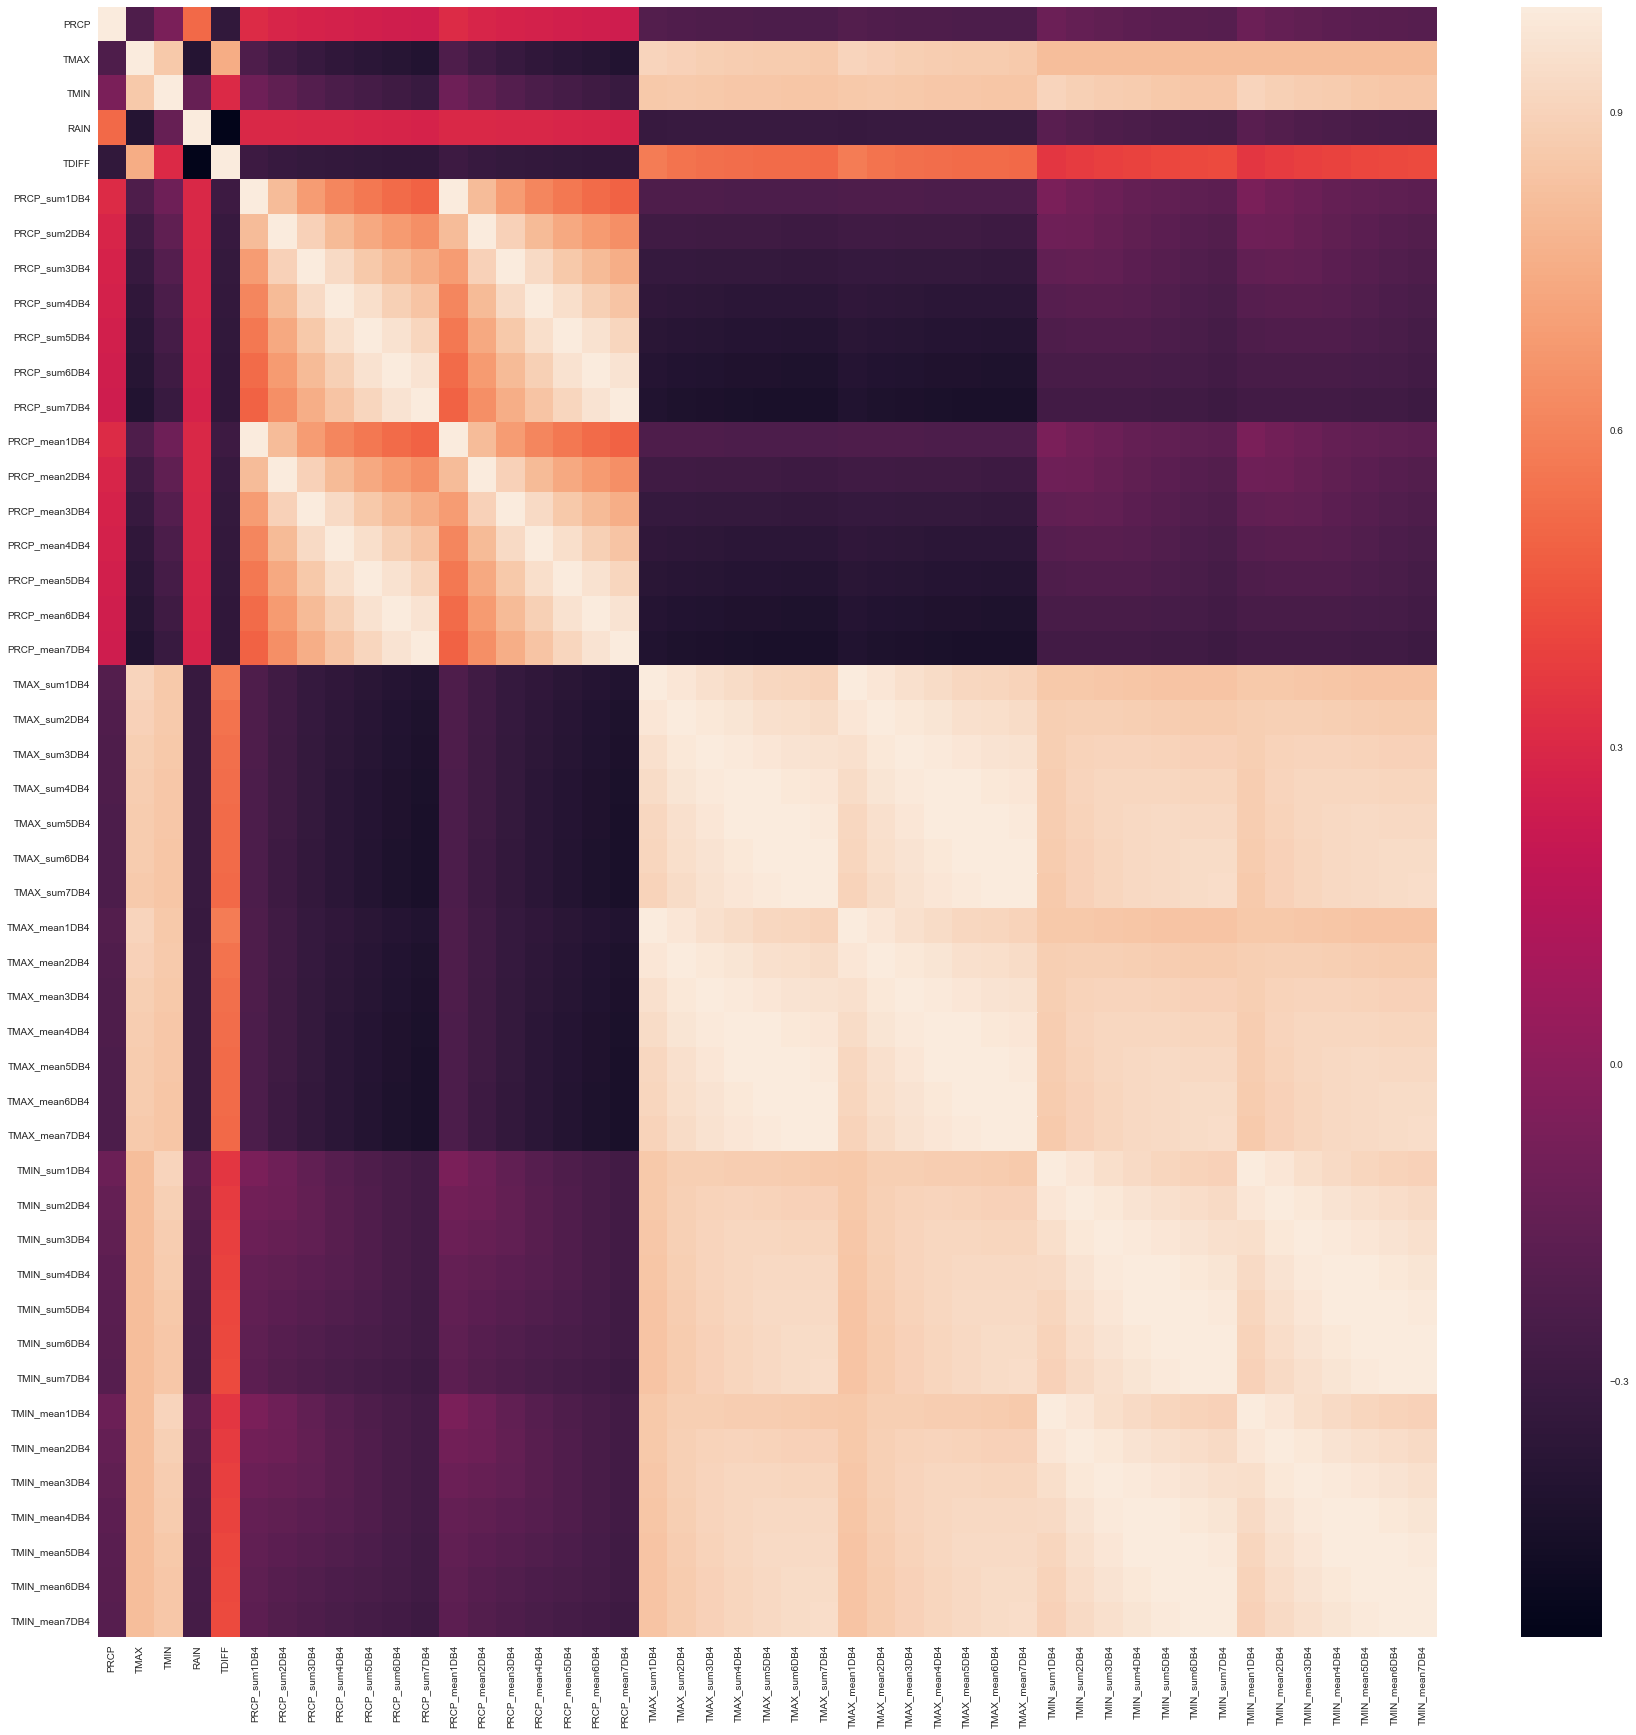

In [58]:
#checking correlation matrix
corr = weather_train.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr, xticklabels='auto', yticklabels='auto', ax=ax )
plt.show()

In [60]:
#Setting variables to play around - try PRCP_sum1DB4 & TMAX_sum1DB4
y_train = weather_train['RAIN']
X_train = weather_train[['PRCP_sum1DB4','TMAX_sum1DB4']]

y_test = weather_test['RAIN']
X_test = weather_test[['PRCP_sum1DB4','TMAX_sum1DB4']]

#For X, pretty much dropping all data that's not from the previous dates.

In [61]:
X_train.head()

,PRCP_sum1DB4,TMAX_sum1DB4
731,7.000000e-02,36.0
732,2.500000e-01,32.0
733,1.000000e-02,24.0
734,1.000000e-01,26.0
735,-9.298118e-16,28.0


In [69]:
#run Ridge_cv with PRCP_sum1DB4 & TMAX_sum1DB4
ridge_cv = RidgeClassifierCV(alphas=(0.1, 100.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, class_weight=None)
ridge_cv.fit(X_train,y_train)
print('Coef: ' , ridge_cv.coef_)
print('Optimal Alpha Value: ', ridge_cv.alpha_)

Coef:  [[ 0.99924453 -0.02037536]]
Optimal Alpha Value:  0.1


In [70]:
#Train data prediction with PRCP_sum1DB4 & TMAX_sum1DB4
preds_train = ridge_cv.predict(X_train)

# compute null accuracy
print ("Train Rained Mean: " , y_train.mean())
print ("Train Null Accuracy" , 1 - y_train.mean())

print ("Train Accuracy:" , metrics.accuracy_score(y_train, preds_train))

Train Rained Mean:  0.423668477021
Train Null Accuracy 0.576331522979
Train Accuracy: 0.671124092921


In [65]:
#Test data prediction
preds_test = ridge_cv.predict(X_test)

# compute null accuracy
print ("Test Rained Mean: " , y_test.mean())
print ("Test Null Accuracy" , 1 - y_test.mean())

print ("Test Accuracy:" , metrics.accuracy_score(y_test, preds_test))

Test Rained Mean:  0.447504302926
Test Null Accuracy 0.552495697074
Test Accuracy: 0.664027538726


It looks like it's better to just use R1DB4 (Rain 1 day before), which had better accuracy.


In [ ]:
#try Logistic Regression Cross Validation with just 'PRCP_sum1DB4' - which should be similar to R1DB4


In [109]:
#logistic regression cross validation with PRCP_sum1DB4
logreg=LogisticRegression()
logreg.fit(weather_train['PRCP_sum1DB4'].reshape(-1, 1), weather_train['RAIN'])
predicted = cross_validation.cross_val_predict(logreg, weather_train['PRCP_sum1DB4'].reshape(-1, 1), weather_train['RAIN'], cv=10)
print(metrics.accuracy_score(weather_train['RAIN'], predicted))
print(metrics.classification_report(weather_train['RAIN'], predicted))

0.671397927981
             precision    recall  f1-score   support

      False       0.65      0.92      0.76     12628
       True       0.75      0.34      0.46      9283

avg / total       0.69      0.67      0.64     21911



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



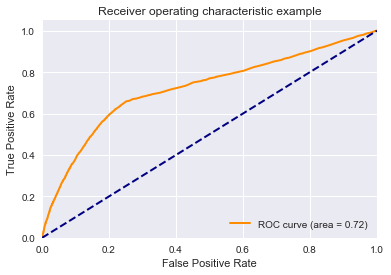

In [111]:
# ROC curve

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(weather_train['PRCP_sum1DB4'].reshape(-1, 1))[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(weather_train['RAIN'], preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()